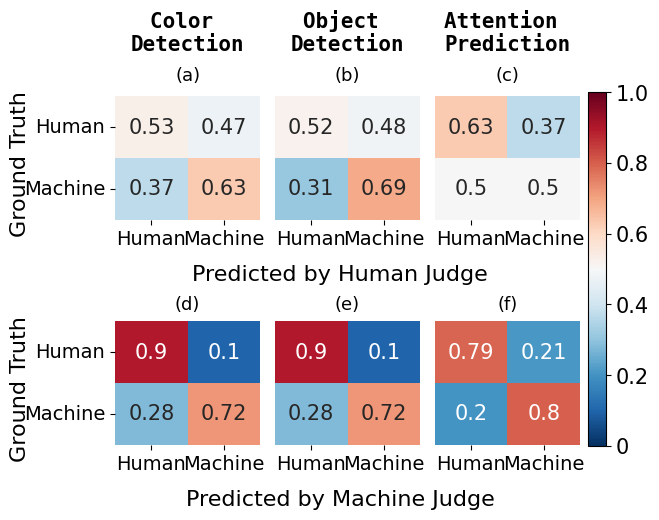

In [1]:
#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import shutil

def compilefullList(rootpath, tasklist, figlist, postfix):
    
    fulllist = []
    for i,t in enumerate(tasklist):
        #print(i)
        tempath = rootpath + tasklist[i] + rootpath2 + figlist[i] + postfix
        fulllist.append(tempath)
        print(tempath)
    return fulllist

def consolidateEPSfiles(fulllist, foldername, plotname):
    foldernameFigs = foldername
    if os.path.exists(foldernameFigs):
        shutil.rmtree(foldernameFigs)
    os.makedirs(foldernameFigs)
    for f in fulllist:
        src = f[:-4]+'.eps'
        dst = foldernameFigs
        shutil.copy(src, foldernameFigs)

    src = plotname + '.png'
    shutil.copy(src, foldernameFigs)
    

######################################################### 
############ Fig 3 ####################

results_dict = {0: {0: [[0.55, 0.45], [0.42, 0.58]], 
                    1: [[0.52, 0.48], [0.31, 0.69]], 
                    2: [[0.63, 0.37], [0.50, 0.50]]}, 
                1: {0: [[0.43, 0.57], [0.66, 0.34]], 
                    1: [[0.90, 0.10], [0.28, 0.72]], 
                    2: [[0.79, 0.21], [0.19, 0.81]] 
                    }}

### load all confmat data

### load all confmat data

#image captioning (for human judges)
with open('../../dominant_color_recognition/Plot/savedResults/Task4_mturk_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[0][0][0][0] = confmat[0][0]
results_dict[0][0][0][1] = confmat[0][1]
results_dict[0][0][1][0] = confmat[1][0]
results_dict[0][0][1][1] = confmat[1][1]

#image captioning (for AI judges)
with open('../../dominant_color_recognition/Plot/savedResults/Task4_machine_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[1][0][0][0] = confmat[0][0]
results_dict[1][0][0][1] = confmat[0][1]
results_dict[1][0][1][0] = confmat[1][0]
results_dict[1][0][1][1] = confmat[1][1]

#wordAssociation (for human judges)
with open('../../multi_label_prediction/Plot/savedResults/Task5_mturk_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[0][0][0][0] = confmat[0][0]
results_dict[0][0][0][1] = confmat[0][1]
results_dict[0][0][1][0] = confmat[1][0]
results_dict[0][0][1][1] = confmat[1][1]

#wordAssociation (for AI judges)
with open('../../multi_label_prediction/Plot/savedResults/Task5_machine_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[1][0][0][0] = confmat[0][0]
results_dict[1][0][0][1] = confmat[0][1]
results_dict[1][0][1][0] = confmat[1][0]
results_dict[1][0][1][1] = confmat[1][1]


#conversation (for human judges)
with open('../../attention_prediction_task/Plot/savedResults/Task6_mturk_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)
    
results_dict[0][2][0][0] = confmat[0][0]
results_dict[0][2][0][1] = confmat[0][1]
results_dict[0][2][1][0] = confmat[1][0]
results_dict[0][2][1][1] = confmat[1][1]

#conversation (for AI judges)
with open('../../attention_prediction_task/Plot/savedResults/Task6_machine_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)
    
results_dict[1][2][0][0] = confmat[0][0]
results_dict[1][2][0][1] = confmat[0][1]
results_dict[1][2][1][0] = confmat[1][0]
results_dict[1][2][1][1] = confmat[1][1]

tasks = ['Color \nDetection', 'Object \nDetection', 'Attention \nPrediction']
tasks_1 = ['(a)\n\n\n\n\n\n\n\n\n\n\n(d)', '(b)\n\n\n\n\n\n\n\n\n\n\n(e)', '(c)\n\n\n\n\n\n\n\n\n\n\n(f)']

fig = plt.figure(figsize = (6, 4.5), constrained_layout=False)
# fig = plt.figure()
# fig.suptitle('Figure title')

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)
for row, subfig in enumerate(subfigs):
    if row == 0:
        subfig.suptitle('Predicted by Human Judge', y=0.25, fontsize=16)
    else:
        subfig.suptitle('Predicted by Machine Judge', y=0.25, fontsize=16)

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    subfig.supylabel('Ground Truth', y=0.7, x=-0.05, fontsize=16)
    
    for col, ax in enumerate(axs):
        
        if row in [0, 1] and col!=0:
            sn.heatmap(results_dict[row][col], annot=True,robust=True, cmap='RdBu_r', 
                       vmin=0, vmax=1, cbar=False, yticklabels=False, ax=ax, annot_kws={"fontsize":15})
        else:
            sn.heatmap(results_dict[row][col], annot=True,robust=True, cmap='RdBu_r', 
                       vmin=0, vmax=1, cbar=False, yticklabels=True, ax=ax, annot_kws={"fontsize":15})
            
            ax.set_yticks([0.5, 1.5]) 
            ax.set_yticklabels(['Human', 'Machine'], rotation=0, fontsize=14)
        ax.set_xticklabels(['Human', 'Machine'], rotation=0, fontsize=14)
        
        if row == 0:
            ax.set_title(tasks[col], fontweight=580, fontfamily='monospace', fontsize=15, y=1.30)
            # ax.set_title(tasks[col]+'\n\n\n\n\n\n\n\n'+'(a)', fontweight=480, fontfamily='monospace', fontsize=15, y=-0.49)
        else:
            ax.set_title(tasks_1[col], y=1.03, fontsize=13)

            
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', shrink=2.04, aspect=20, anchor=(1.5, -0.42))
cbar.ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=15, rotation=0)

#fig.supylabel('Ground Truth', y=0.6, fontsize=16)
fig.subplots_adjust(top=1, bottom=0.45, wspace=0.1)

#plt.tight_layout()
plt.savefig('./FigsAll/TaskAll_overall_confmat.eps', format='eps')
plt.savefig('./FigsAll/TaskAll_overall_confmat.svg')
plt.savefig('./FigsAll/TaskAll_overall_confmat.png', bbox_inches='tight')
#plt.savefig('fig4_mod.pdf', bbox_inches = 'tight')
plt.show()

# moving files
foldername = 'IndividualFigs/FigS12/'
fulllist = ['./FigsAll/TaskAll_overall_confmat.eps']
plotname = './FigsAll/TaskAll_overall_confmat'
consolidateEPSfiles(fulllist, foldername, plotname)


In [2]:
#import libraries
import cv2
from matplotlib import pyplot as plt

#rootpath = '/home/mengmi/Desktop/Turing/'
rootpath = 'C:/Users/a0091/OneDrive/Desktop/TuringGithub/'
#rootpath = 'C:/Personal/Projects/Proj_Turing/Turing/'
rootpath2 = '/Plot/plots/'
postfix = '.png'

C:/Users/a0091/OneDrive/Desktop/TuringGithub/dominant_color_recognition/Plot/plots/Task4_mturk_mturk_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/dominant_color_recognition/Plot/plots/Task4_machine_machine_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/multi_label_prediction/Plot/plots/Task5_mturk_mturk_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/multi_label_prediction/Plot/plots/Task5_machine_machine_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_mturk_mturk_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_machine_machine_overall_confmat.png


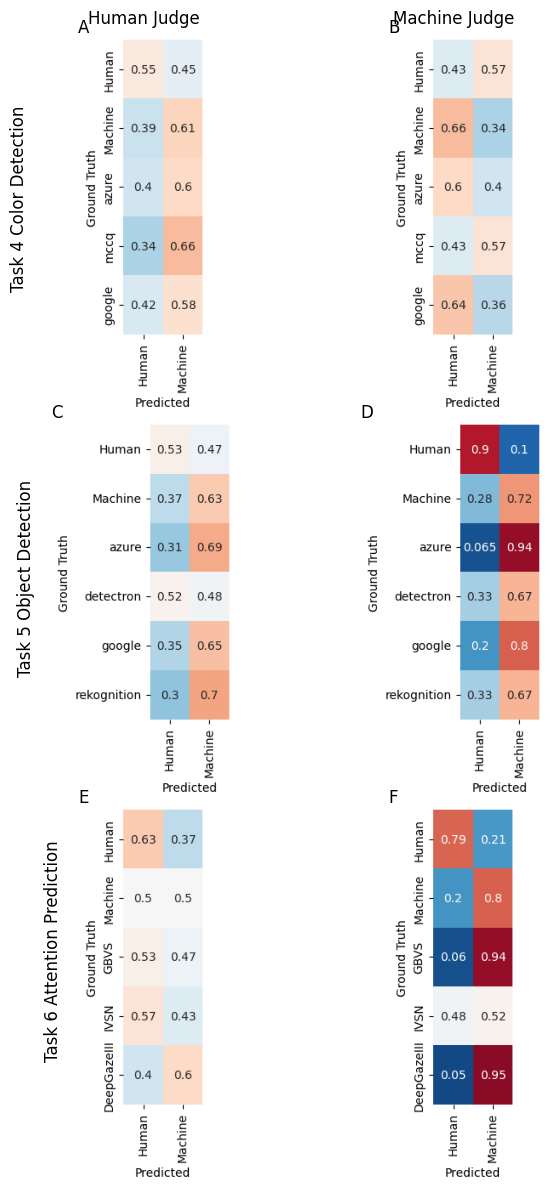

In [3]:
################################## FigS1
tasklist = ['dominant_color_recognition','dominant_color_recognition','multi_label_prediction','multi_label_prediction',
            'attention_prediction_task','attention_prediction_task']
figlist=['Task4_mturk_mturk_overall_confmat','Task4_machine_machine_overall_confmat',
        'Task5_mturk_mturk_overall_confmat','Task5_machine_machine_overall_confmat',
        'Task6_mturk_mturk_overall_confmat','Task6_machine_machine_overall_confmat']
plotname = 'FigsAll/FigS13_confmatOverall'
alphabetlabels = ['A','B','C','D','E','F']

# setting values to rows and column variables
rows = 3
columns = 2
unitlengthR = 5
unitlengthC =4

fulllist = compilefullList(rootpath, tasklist, figlist, postfix)
fig = plt.figure(figsize=(columns*unitlengthC, rows*unitlengthR))
  
# reading images
for i,t in enumerate(tasklist):
    image = cv2.imread(fulllist[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    
    fig.add_subplot(rows, columns, i+1)
    plt.text(-0, 0, alphabetlabels[i],rotation=0, fontsize=12)
    
    # showing image
    plt.imshow(image)
    plt.axis('off')
    if i == 0:
        plt.title("Human Judge")
        #plt.suptitle("Task 1 Image Captioning")
        plt.text(-80, 300, 'Task 4 Color Detection',rotation=90, fontsize=12)
    elif i == 1:
        plt.title("Machine Judge")
    elif i == 2:
        plt.text(-40, 300, 'Task 5 Object Detection',rotation=90, fontsize=12)
        #plt.suptitle("Task 2 Word Association")
    elif i == 4:
        #plt.suptitle("Task 3 Conversation")
        plt.text(-40, 300, 'Task 6 Attention Prediction',rotation=90, fontsize=12)
        
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
plt.savefig(plotname + '.png',  bbox_inches='tight')
plt.show()

# moving files
foldername = 'IndividualFigs/FigS13_confmatOverall/'
consolidateEPSfiles(fulllist, foldername, plotname)

C:/Users/a0091/OneDrive/Desktop/TuringGithub/dominant_color_recognition/Plot/plots/Task4_mturk_gender_DemorDistri.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/dominant_color_recognition/Plot/plots/Task4_mturk_demor_GenderBarPlotOverall.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/dominant_color_recognition/Plot/plots/Task4_mturk_education_DemorDistri.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/dominant_color_recognition/Plot/plots/Task4_mturk_demor_EducationBarPlotOverall.png


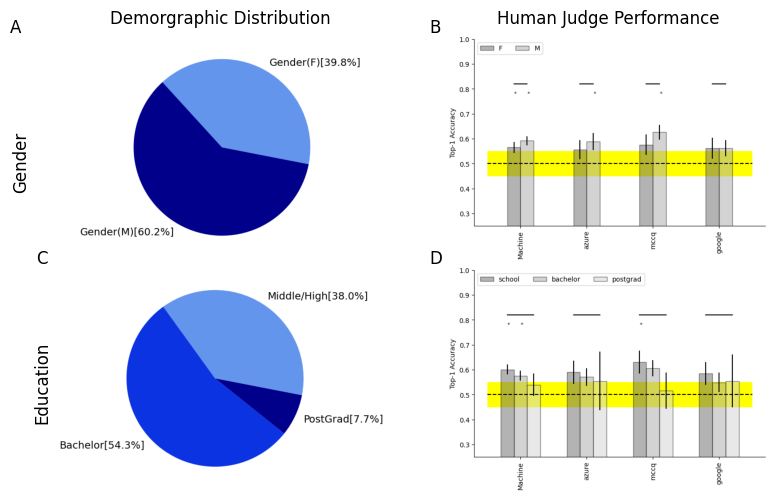

In [4]:
################################## FigS2
tasklist = ['dominant_color_recognition','dominant_color_recognition','dominant_color_recognition','dominant_color_recognition']
#,'imagecaption','imagecaption']
# figlist=['Task1_combined_age_DemorDistri','Task1_combined_demor_AgeBarPlotOverall',
#         'Task1_combined_gender_DemorDistri','Task1_combined_demor_GenderBarPlotOverall',
#         'Task1_combined_education_DemorDistri','Task1_combined_demor_EducationBarPlotOverall']

figlist=['Task4_mturk_gender_DemorDistri','Task4_mturk_demor_GenderBarPlotOverall',
        'Task4_mturk_education_DemorDistri','Task4_mturk_demor_EducationBarPlotOverall']

plotname = 'FigsAll/FigS14_demorgraphic_bar_task4'
alphabetlabels = ['A','B','C','D','E','F']

# setting values to rows and column variables
rows = 2
columns = 2
unitlengthR = 3
unitlengthC = 5

fulllist = compilefullList(rootpath, tasklist, figlist, postfix)
fig = plt.figure(figsize=(columns*unitlengthC, rows*unitlengthR))
  
# reading images
for i,t in enumerate(tasklist):
    image = cv2.imread(fulllist[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    
    fig.add_subplot(rows, columns, i+1)
    
    if i != 0:
        plt.text(-35, 0, alphabetlabels[i],rotation=0, fontsize=12)
    # showing image
    plt.imshow(image)
    plt.axis('off')
    if i == 1:
        plt.title("Human Judge Performance")
        #plt.suptitle("Task 1 Image Captioning")        
    elif i == 0:
        plt.title("Demorgraphic Distribution")
        #plt.text(-70, 200, 'Age',rotation=90, fontsize=12)
    #elif i == 2:
        plt.text(-120, 300, 'Gender',rotation=90, fontsize=12)
        plt.text(-125, 0, alphabetlabels[i],rotation=0, fontsize=12)
        #plt.suptitle("Task 2 Word Association")
    elif i == 2:
        #plt.suptitle("Task 3 Conversation")
        plt.text(-40, 300, 'Education',rotation=90, fontsize=12)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
plt.savefig(plotname + '.png',  bbox_inches='tight')
plt.show()

# moving files
foldername = 'IndividualFigs/FigS14_demorgraphic_bar_task4/'
consolidateEPSfiles(fulllist, foldername, plotname)

C:/Users/a0091/OneDrive/Desktop/TuringGithub/multi_label_prediction/Plot/plots/Task5_mturk_gender_DemorDistri.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/multi_label_prediction/Plot/plots/Task5_mturk_demor_GenderBarPlotOverall.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/multi_label_prediction/Plot/plots/Task5_mturk_education_DemorDistri.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/multi_label_prediction/Plot/plots/Task5_mturk_demor_EducationBarPlotOverall.png


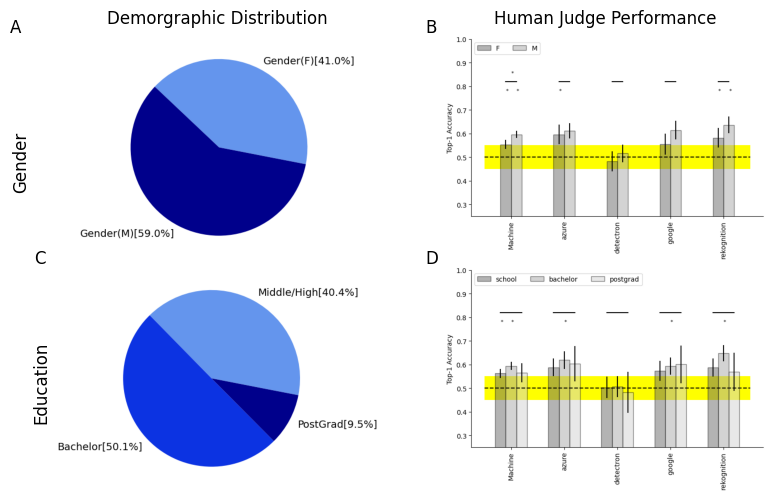

In [5]:
################################## FigS2
tasklist = ['multi_label_prediction','multi_label_prediction','multi_label_prediction',
            'multi_label_prediction'] #,'wordAssociation','wordAssociation']
# figlist=['Task2_combined_age_DemorDistri','Task2_combined_demor_AgeBarPlotOverall',
#         'Task2_combined_gender_DemorDistri','Task2_combined_demor_GenderBarPlotOverall',
#         'Task2_combined_education_DemorDistri','Task2_combined_demor_EducationBarPlotOverall']

figlist=['Task5_mturk_gender_DemorDistri','Task5_mturk_demor_GenderBarPlotOverall',
        'Task5_mturk_education_DemorDistri','Task5_mturk_demor_EducationBarPlotOverall']

plotname = 'FigsAll/FigS15_demorgraphic_bar_task5'
alphabetlabels = ['A','B','C','D','E','F']

# setting values to rows and column variables
rows = 2
columns = 2
unitlengthR = 3
unitlengthC = 5

fulllist = compilefullList(rootpath, tasklist, figlist, postfix)
fig = plt.figure(figsize=(columns*unitlengthC, rows*unitlengthR))
  
# reading images
for i,t in enumerate(tasklist):
    image = cv2.imread(fulllist[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    
    fig.add_subplot(rows, columns, i+1)
    
    if i != 0:
        plt.text(-35, 0, alphabetlabels[i],rotation=0, fontsize=12)
    # showing image
    plt.imshow(image)
    plt.axis('off')
    if i == 1:
        plt.title("Human Judge Performance")
        #plt.suptitle("Task 1 Image Captioning")        
    elif i == 0:
        plt.title("Demorgraphic Distribution")
        #plt.text(-70, 200, 'Age',rotation=90, fontsize=12)
    #elif i == 2:
        plt.text(-120, 300, 'Gender',rotation=90, fontsize=12)
        plt.text(-125, 0, alphabetlabels[i],rotation=0, fontsize=12)
        #plt.suptitle("Task 2 Word Association")
    elif i == 2:
        #plt.suptitle("Task 3 Conversation")
        plt.text(-40, 300, 'Education',rotation=90, fontsize=12)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
plt.savefig(plotname + '.png',  bbox_inches='tight')
plt.show()

# moving files
foldername = 'IndividualFigs/FigS15_demorgraphic_bar_task5/'
consolidateEPSfiles(fulllist, foldername, plotname)

C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_mturk_gender_DemorDistri.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_mturk_demor_GenderBarPlotOverall.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_mturk_education_DemorDistri.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_mturk_demor_EducationBarPlotOverall.png


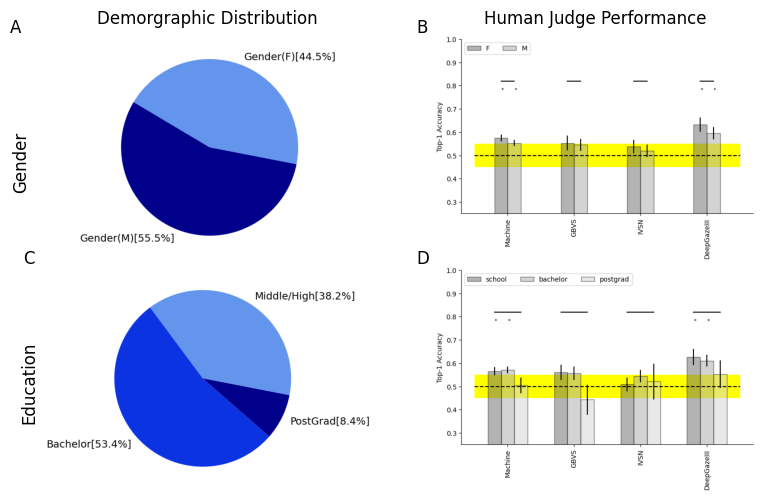

In [6]:
################################## FigS4
tasklist = ['attention_prediction_task','attention_prediction_task','attention_prediction_task',
            'attention_prediction_task'] #,'conversation','conversation']
# figlist=['Task3_inlab_age_DemorDistri','Task3_inlab_demor_AgeBarPlotOverall',
#         'Task3_inlab_gender_DemorDistri','Task3_inlab_demor_GenderBarPlotOverall',
#         'Task3_inlab_education_DemorDistri', 'Task3_inlab_demor_EducationBarPlotOverall']
figlist=['Task6_mturk_gender_DemorDistri','Task6_mturk_demor_GenderBarPlotOverall',
        'Task6_mturk_education_DemorDistri','Task6_mturk_demor_EducationBarPlotOverall']

plotname = 'FigsAll/FigS16_demorgraphic_bar_task6'
alphabetlabels = ['A','B','C','D','E','F']

# setting values to rows and column variables
rows = 2
columns = 2
unitlengthR = 3
unitlengthC = 5

fulllist = compilefullList(rootpath, tasklist, figlist, postfix)
fig = plt.figure(figsize=(columns*unitlengthC, rows*unitlengthR))
  
# reading images
for i,t in enumerate(tasklist):
    image = cv2.imread(fulllist[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    
    fig.add_subplot(rows, columns, i+1)
    
    if i != 0:
        plt.text(-35, 0, alphabetlabels[i],rotation=0, fontsize=12)
    # showing image
    plt.imshow(image)
    plt.axis('off')
    if i == 1:
        plt.title("Human Judge Performance")
        #plt.suptitle("Task 1 Image Captioning")        
    elif i == 0:
        plt.title("Demorgraphic Distribution")
        #plt.text(-70, 200, 'Age',rotation=90, fontsize=12)
    #elif i == 2:
        plt.text(-120, 300, 'Gender',rotation=90, fontsize=12)
        plt.text(-125, 0, alphabetlabels[i],rotation=0, fontsize=12)
        #plt.suptitle("Task 2 Word Association")
    elif i == 2:
        #plt.suptitle("Task 3 Conversation")
        plt.text(-40, 300, 'Education',rotation=90, fontsize=12)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
plt.savefig(plotname + '.png',  bbox_inches='tight')
plt.show()

# moving files
foldername = 'IndividualFigs/FigS16_demorgraphic_bar_task6/'
consolidateEPSfiles(fulllist, foldername, plotname)

C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_mturk_FV_mturk_FV_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_machine_FV_AI_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_mturk_VS_mturk_VS_overall_confmat.png
C:/Users/a0091/OneDrive/Desktop/TuringGithub/attention_prediction_task/Plot/plots/Task6_machine_VS_AI_overall_confmat.png


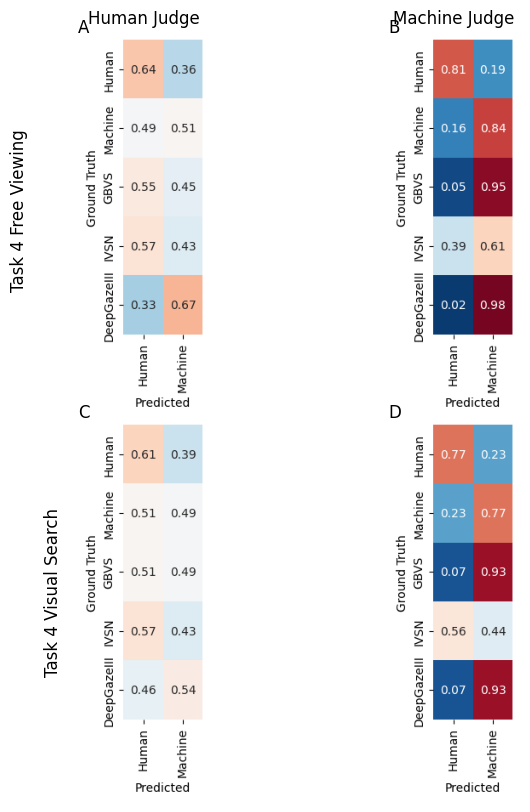

In [7]:
################################## FigS5
tasklist = ['attention_prediction_task','attention_prediction_task','attention_prediction_task','attention_prediction_task']
figlist=['Task6_mturk_FV_mturk_FV_overall_confmat','Task6_machine_FV_AI_overall_confmat',
         'Task6_mturk_VS_mturk_VS_overall_confmat','Task6_machine_VS_AI_overall_confmat']
plotname = 'FigsAll/FigS15_VSearch_FreeV_confmat_Task6'
alphabetlabels = ['A','B','C','D']

# setting values to rows and column variables
rows = 2
columns = 2
unitlengthR = 5
unitlengthC =4

fulllist = compilefullList(rootpath, tasklist, figlist, postfix)
fig = plt.figure(figsize=(columns*unitlengthC, rows*unitlengthR))
  
# reading images
for i,t in enumerate(tasklist):
    image = cv2.imread(fulllist[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    
    fig.add_subplot(rows, columns, i+1)
    plt.text(-0, 0, alphabetlabels[i],rotation=0, fontsize=12)
    
    # showing image
    plt.imshow(image)
    plt.axis('off')
    if i == 0:
        plt.title("Human Judge")
        #plt.suptitle("Task 1 Image Captioning")
        plt.text(-80, 300, 'Task 4 Free Viewing',rotation=90, fontsize=12)
    elif i == 1:
        plt.title("Machine Judge")
    elif i == 2:
        plt.text(-40, 300, 'Task 4 Visual Search',rotation=90, fontsize=12)
        #plt.suptitle("Task 2 Word Association")
        
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
plt.savefig(plotname + '.png',  bbox_inches='tight')
plt.show()

# moving files
foldername = 'IndividualFigs/FigS15_VSearch_FreeV_confmat_Task6/'
consolidateEPSfiles(fulllist, foldername, plotname)